## Aula 26 - NLP

### Warm up

![](https://media1.tenor.com/images/2c5e2003710c3f8e3d39ebb424b80f0c/tenor.gif?itemid=6169062)

### Expectativas

![](https://everythingbutthebooks.files.wordpress.com/2014/06/gif-rapunzel.gif)

### O que é NLP?

- Campo relativamente novo da computação que combina ML e linguística.
- Principal foco: fazer as máquinas entendam (e até se comuniquem) em linguagem humana. 
- Área de pesquisa/atuação extremamente ampla.
- Biggest consequence: lowering (or complete removal) of the barrier to entry for BI and big data in general: 

> "Google might tell you today what the weather will be tomorrow. But soon enough, you’ll be able to ask your personal data chatbot about customer sentiment today, and how they’ll feel about your brand next week; all while walking down the street."
> https://www.sisense.com/blog/heres-natural-language-processing-future-bi/

<img src="images/nlp-diagram.jpg" width="800"/>

##### Exemplos?

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.



![](images/nlp-fields.png)

                       - Autocomplete: celular, e-mail, pesquisa Google.
                       - Spell checker
                       - Spam detection
                       - Information Retrieval: query do usuário -> produto/documento (Google)
                       - Chatbot
                       - Q&A: pergunta -> resposta (Watson/Jeopardy)
                       - Speech recognition
                       - Machine Translation (Google Translate)

### Os dados: 
Suponha que você é um Cientista de Dados, trabalha em um app de um restaurante e tem reviews de alguns clientes.

*PS: Esse conjunto de dados é composto de reviews de restaurantes e foi modificado a partir do dataset usado no workshop SemEval (International Workshop on Semantic Evaluation) na [edição de 2016](http://alt.qcri.org/semeval2016/task5/).*

In [5]:
import re
import pickle
import pandas as pd
import en_core_web_sm
import spacy
from spacy.lang.en import English
from collections import Counter
from pycontractions import Contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from utils.confusion_matrix import plot_confusion_matrix
from utils.to_dense import DenseTransformer

pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 999

In [ ]:
#!python -m spacy download en_core_web_sm
#!pip install pycontractions

In [ ]:
pd.read_csv('data/raw/raw_reviews.csv').sample(5)

### Qual a tarefa??

Como agregar valor ao negócio a partir desses dados?


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


### Tarefa: *Sentiment analysis*
Classificar review em positiva ou negativa.

In [6]:
train_df = pd.read_csv('data/processed/train.csv')
test_df = pd.read_csv('data/processed/test.csv')

train_df.head()

,text,polarity
0,"It is nearly impossible to get a table, so if you ever have the chance to go here for dinner, DO NOT pass it up.",positive
1,I won't go back unless someone else is footing the bill.,negative
2,There are so many better places to visit!,negative
3,This place is a must visit!,positive
4,but the service was a bit slow.,positive


### As ferramentas
- Principal biblioteca atualmente para trabalhar com NLP: *Spacy*. 

* O datacamp lançou recentemente um [curso](https://campus.datacamp.com/courses/advanced-nlp-with-spacy) bem legal sobre ele que vale a pena dar uma conferida já que hoje, focaremos no "básico".

- Outra lib bastante usada (principal biblioteca até alguns meses atrás): [NLTK](https://www.nltk.org/), .

- Outras iniciativas famosas com deep learning: [AllenNLP](https://allennlp.org/) e o [StanfordNLP](https://stanfordnlp.github.io/stanfordnlp/), que são capazes de atingir o estado da arte de muitas aplicações.


#### Spacy: 
- Conceito de objeto (comumente chamada de 'nlp') que contém todo o pipeline de processamento, além de outras regras específicas de uma certa língua.

In [8]:
#from spacy.lang.en import English
nlp = English()

### Como a máquina vai "entender" os textos?

[![](http://img.youtube.com/vi/d4gGtcobq8M/0.jpg)](http://www.youtube.com/watch?v=d4gGtcobq8M "")


                    **Patterns, Disambiguation (context), Stopwords, Tokens, Bag-of-words, TF, TF-IDF**

**Pipeline NLP**
<img src="images/nlp-pipe.png" width="500"/>

#### Patterns
Em alguns casos, pode ser interessante substituir certas partes em textos fixos, como horários, quantidades, emails.

Exemplo:

In [9]:
re.sub(u'[a-z0-9\_\.\-]*@[a-z0-9\_\.\-]*', 'EMAIL_ADDR', u'hi there thais.neubauer@gmail.com!',flags=re.UNICODE)

'hi there EMAIL_ADDR!'

#### Tokenization
- Segmentação de sentenças em "palavras".
- Análise léxica: eliminação de caracteres de pontuação e outros caracteres "especiais" - não alfa-numéricos (em alguns casos, excluindo até mesmo os numéricos e acentuação).

Exemplos de potenciais problemas:

<img src="images/nlp-tokenizing_problems.png" width="600"/>

In [10]:
doc = nlp("We went around 9:30 on a Friday...")
tokens = [token.text for token in doc]
tokens

['We', 'went', 'around', '9:30', 'on', 'a', 'Friday', '...']

In [11]:
doc = nlp("It's also attached to Angel's Share, which is a cool, more romantic bar...")
tokens = [token.text for token in doc]
tokens

['It',
 "'s",
 'also',
 'attached',
 'to',
 'Angel',
 "'s",
 'Share',
 ',',
 'which',
 'is',
 'a',
 'cool',
 ',',
 'more',
 'romantic',
 'bar',
 '...']

* Exercício: Crie o objeto nlp para português e imprima o texto do primeiro token

In [12]:
# Import the Portuguese language class
from spacy.lang.pt import Portuguese

# Create the nlp object
nlp_pt = Portuguese()

# Process a text
doc = nlp_pt("Isso é uma sentença")

# Select the first token
first_token = doc[0]

# Print the first token's text
print(first_token.text)

Isso


### Pré-processamento

#### Removing stopwords (and maybe other tokens)
- Para muitas tarefas de NLP, é bom prestar atenção nas chamadas *stopwords*, que são as palavras muito comuns que aparecem no texto e que, por isso, não tem potencial para contribuir para a caracterização do conteúdo presente no texto. 

- Nessa lista geramente estão: artigos definidos e indefinidos, preposições, pronomes, numerais, conjunções e advérbios. 

-> IMPORTANTE: Além das palavras pertencentes a essas classes gramaticais, podem entrar na lista as palavras muito comuns dentro do contexto referente aos documentos do corpus.

Lei de Zipf e proposta de cortes de Luhn:

<img src="images/nlp-freq_import.png" width="500"/>

In [7]:
from collections import Counter
#splita as frases por palavras (espaco incluido) e soma elas
Counter(sum(train_df['text'].str.lower().str.split(r'[\W\s]+').tolist(), [])).most_common(10)

[('', 309),
 ('the', 177),
 ('a', 103),
 ('to', 97),
 ('and', 92),
 ('i', 90),
 ('is', 79),
 ('it', 75),
 ('for', 56),
 ('you', 55)]

In [13]:
countings = dict(Counter(sum(train_df['text'].str.lower().str.split(r'[\W\s]+').tolist(), [])).items())

In [20]:
countings

{'it': 75,
 'is': 79,
 'nearly': 2,
 'impossible': 1,
 'to': 97,
 'get': 9,
 'a': 103,
 'table': 4,
 'so': 18,
 'if': 19,
 'you': 55,
 'ever': 2,
 'have': 19,
 'the': 177,
 'chance': 1,
 'go': 32,
 'here': 9,
 'for': 56,
 'dinner': 5,
 'do': 4,
 'not': 26,
 'pass': 1,
 'up': 7,
 '': 309,
 'i': 90,
 'won': 3,
 't': 35,
 'back': 36,
 'unless': 2,
 'someone': 2,
 'else': 3,
 'footing': 1,
 'bill': 2,
 'there': 21,
 'are': 24,
 'many': 8,
 'better': 6,
 'places': 10,
 'visit': 9,
 'this': 44,
 'place': 43,
 'must': 3,
 'but': 28,
 'service': 24,
 'was': 39,
 'bit': 6,
 'slow': 1,
 'amazing': 5,
 'fun': 3,
 'hot': 2,
 'dog': 2,
 'lovers': 2,
 'of': 37,
 'all': 20,
 'ages': 1,
 'please': 3,
 'yourself': 3,
 'favor': 1,
 'and': 92,
 'check': 5,
 'out': 12,
 'leave': 2,
 'room': 2,
 'dessert': 5,
 've': 3,
 'been': 8,
 'time': 12,
 'never': 10,
 'disappointed': 5,
 'personally': 1,
 'like': 12,
 'margherita': 1,
 'pizza': 5,
 'they': 14,
 'good': 27,
 'm': 6,
 'astonished': 1,
 'that': 29,
 'r

In [19]:
import operator 
sorted(countings.items(), key=operator.itemgetter(1))

[('impossible', 1),
 ('chance', 1),
 ('pass', 1),
 ('footing', 1),
 ('slow', 1),
 ('ages', 1),
 ('favor', 1),
 ('personally', 1),
 ('margherita', 1),
 ('astonished', 1),
 ('categorized', 1),
 ('correct', 1),
 ('guest', 1),
 ('upgraded', 1),
 ('excuse', 1),
 ('lousy', 1),
 ('afternoons', 1),
 ('band', 1),
 ('playing', 1),
 ('lots', 1),
 ('case', 1),
 ('saving', 1),
 ('agreed', 1),
 ('mare', 1),
 ('seafood', 1),
 ('russe', 1),
 ('wants', 1),
 ('grade', 1),
 ('heartbeat', 1),
 ('high', 1),
 ('scale', 1),
 ('beater', 1),
 ('thanked', 1),
 ('others', 1),
 ('guys', 1),
 ('huge', 1),
 ('crust', 1),
 ('thin', 1),
 ('mind', 1),
 ('ordering', 1),
 ('intermediate', 1),
 ('range', 1),
 ('prefer', 1),
 ('via', 1),
 ('blocks', 1),
 ('crowded', 1),
 ('several', 1),
 ('dissapoints', 1),
 ('relax', 1),
 ('jersey', 1),
 ('deli', 1),
 ('im', 1),
 ('honest', 1),
 ('mistake', 1),
 ('ther', 1),
 ('anniversary', 1),
 ('valentines', 1),
 ('wont', 1),
 ('dozen', 1),
 ('complaints', 1),
 ('uws', 1),
 ('absurdly

***

O que essa regex está fazendo é basicamente convertendo todo o texto para minúsculo e depois 'splitando' em tokens sempre que o texto encontra um caracter em brando (\s) **ou** sempre que encontra um caracter que **não** é alfanumérico ([^a-zA-Z0-9]), representado pelo \W

Depois, ela pega as 10 ocorrências mais comumns.

***

No spacy já existe uma lista de stopwords comuns, que podemos ver assim:

In [29]:
nlp = spacy.load('en_core_web_sm')

en_stopwords = sorted([token.text for token in nlp.vocab if token.is_stop])
en_stopwords[155:161]

['no', 'nobody', 'none', 'noone', 'nor', 'not']

* Exercício:
Explore um pouco a lista e analise as que você acha que podem ser excluídas.

In [30]:
#list_excl = ['cannot', 'go', 'off']
list_excl = ['cannot', 'go', 'never', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'nowhere', 'off']


for w in list_excl:
    nlp.vocab[w].is_stop = False

Para verificarmos quais palavras excluímos da lista de stopwords:

In [31]:
' -- '.join([w for w in en_stopwords if not nlp.vocab[w].is_stop])

'cannot -- go -- never -- no -- nobody -- none -- noone -- nor -- not -- nothing -- nowhere -- off'

- Além de excluir, podemos também incluir, pois, como dito no início da conversa sobre *stopwords*, podem entrar na lista as palavras muito comuns dentro do contexto referente aos documentos do corpus.
- Outra forma de **definir stopwords** é **verificando a frequência das palavras no corpus**, ou seja, contando a frequência de cada token no *corpus*.

#### Stemming
Normalize words into its base or root form, using common prefixes and suffixes.

Exemplo: affectation, affects, affections, affected, affection, affecting -> affect.

Problemas: boiando -> boi, factual -> fact (suffixe "ual"), equal -> eq (suffixe "ual").

#### Lemmatization
Also maps several similar words into one common root, but groups together different inflected forms of a word to its *lemma* (dictionary needed), which is a proper word. 

Exemplo: gone, going, went -> go

#### Part-Of-Speech (POS) Tags
Grammatical type of the word: noun, verb, adjective, adverb, pronoun, preposition, conjunction, determiner, exclamation.

Exemplo: 

<img src="images/nlp-pos.png" width="300" align="left"/>

##### Objeto "Token" - Spacy

É possível carregar alguns modelos pré treinados no Spacy para prever atributos linguísticos, como:

- POS tags (classificação gramátical - Apple companhia vs apple fruta)
- Nomeação de Entidades (Apple companhia, Photograph Nickelback album)


Tais modelos estão divididos em pacotes que precisam ser baixados, como o 'en_core_web_sm', pacote com vários modelos treinados em inglês.


O objeto Token é um objeto que possui vários atributos, inclusive o "pos_" . Outros atributos importantes/legais:

<img src="images/spacy.png" width="700"/>

In [18]:
nlp = English()
nlp = spacy.load('en_core_web_sm')

doc = nlp("She ate the pizza")
for token in doc:
    print(token.text, token.pos_)

She PRON
ate VERB
the DET
pizza NOUN


In [19]:
doc = nlp("I heard Photograph from Nicklelback yesterday !")
for ent in doc.ents:
    print(ent.text, ent.label_)

Photograph ORG
Nicklelback PERSON
yesterday DATE


* Exercício: Se usarmos .lower() no texto abaixo, como ficam as entidades?

In [21]:
# Process the text in lowercase
text = "I heard Photograph from Nicklelback yesterday!"
doc = nlp(text.lower())

# Print entities' texts and labels 
for ent in doc.ents:
    print(ent.text, ent.label_)

yesterday DATE


#### Normalização:

- Além do que já comentamos até aqui, outras diferentes formas de escrever a mesma coisa podem "confundir" os algoritmos. 

- Transformar o texto todo em minúsculo e retirar acentos, pro exemplo, são bastante comuns. 

CUIDADO pra essas etapas não atrapalharem outras, como identificação de entidades!!!


##### Contractions 
Outro exemplo de normalização interessante na língua inglesa é a expansão de contrações: I'm -> I am, We're -> we are etc.

Para expansão de contractions, usaremos o [PyContractions](https://pypi.org/project/pycontractions/) e especificaremos o modelo da api gensim.downloader:

In [39]:
cont = Contractions(api_key="glove-twitter-100")
list(cont.expand_texts(["We're all so happy!! Can't believe this!"]))

['we are all so happy!! cannot believe this!']

#### Etapas do pré-processamento:


1. Remove entidades (remove_ents);
2. Expande constrações (expand_contractions);
3. Transforme tudo para minúscula;
4. Remove stopwords e pontuações (remove_stop_and_punct).

IMPORTANTE: Atenção na ordem!!!

- Exercício: Crie uma função ```preprocess``` que recebe qualquer string como entrada e faz todas as etapas do pré-processamento.

In [1]:
def remove_ents(text):
    doc = nlp(text)
    for ent in doc.ents:
        text = text.replace(ent.text, '')
    return text


def expand_contractions(text):
    return list(cont.expand_texts([text]))[0]

        
def remove_stop_and_punct(text):
    doc = nlp(text.lower())
    tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        tokens.append(token.text)
    return ' '.join(tokens)

In [2]:
def preprocess(original_text):
    new_text = remove_ents(original_text)
    new_text = expand_contractions(new_text)
    if len(new_text) == 0:
        return new_text 
    return remove_stop_and_punct(new_text)

In [35]:
#Ja fizemos isso neste notebook, mas aqui teriamos que carregar esses objetos se já não estivéssemos feito ainda, 
#pois as funções estão usando-os. Porém, atenção: carregamos E alteramos o en_core_web_sm quando exluímos algumas 
#palavras da lista de stopwords, então se carregarmos novamente, temos que excluir as stopwords novamente também

#nlp = English()
#nlp = spacy.load('en_core_web_sm') 

In [36]:
assert(preprocess("It's also not attached to Angel's Share, which is a cool, more romantic bar...") 
       == 'not attached cool romantic bar')

- Exercício: Aplique sua função preprocess à coluna text (dos dois dataframes, train_df e test_df), criando uma coluna nova norm_text, que será usada para treinarmos um modelo de análise de sentimento. Dica: Use o apply do pandas!

In [316]:
train_df['norm_text'] = train_df['text'].apply(preprocess)
train_df.to_pickle('data/processed/train_preprocessed.pickle')
print("Train:\n")
display(train_df[['text','norm_text','polarity']].sample(n=5))

Train:



,text,norm_text,polarity
193,One of my favorite places in Manhattan.,favorite places,positive
240,It is obvious that no one in the restaurant has any idea about or experience with Japanese cuisine.,obvious no restaurant idea experience cuisine,negative
188,My fav was the sassy lassi...,fav sassy lassi,positive
213,An excellent service,excellent service,positive
319,DONOT GO!,donot go,negative


In [38]:
test_df['norm_text'] = test_df['text'].apply(preprocess)
test_df.to_pickle('data/processed/train_preprocessed.pickle')
print("Test:\n")
display(test_df[['text','norm_text','polarity']].sample(n=5))

Test:



,text,norm_text,polarity
4,Can’t believe how an expensive NYC restaurant can be so disrespectful to its clients.,n’t believe expensive restaurant disrespectful clients,negative
65,They are not greasy or anything.,not greasy,negative
19,A perfect place to take out of town guests any time of the year.,perfect place town guests time,positive
8,The food is great and they make a mean bloody mary.,food great mean bloody mary,positive
74,I noticed alot of indian people eatting there which is a great sign for an indian place!,noticed alot indian people eatting great sign indian place,positive


### Feature engineering

#### Bag of words

<img src="images/nlp-bow.png" width="400"/>

- Com o Scikit Learn: [CountVectorizer](https://scikit-learn.org/0.19/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [73]:
examples_for_bow = [
    'camisa preta botao botao botao',
    'botao feito linha preta',
    'considera-se caro preco botao camisa botao',
    'linha costurar botão mesma camisa',
    'costurar linha camisa mesma botao'
]

In [122]:
cv = CountVectorizer(strip_accents='unicode', binary=True)
bow_matrix = cv.fit_transform(examples_for_bow)
columns = [token[0] for token in sorted(cv.vocabulary_.items(), key=lambda item: item[1])]
pd.DataFrame(bow_matrix.todense(), columns=columns)

,botao,camisa,caro,considera,costurar,feito,linha,mesma,preco,preta,se
0,1,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,1,0,0,1,0
2,1,1,1,1,0,0,0,0,1,0,1
3,1,1,0,0,1,0,1,1,0,0,0
4,1,1,0,0,1,0,1,1,0,0,0


- Exercício: Use o parâmetro 'max_features' do CountVectorizer para diminuir a quantidade de dimensões e veja a diferença na matriz resultante:

In [126]:
cv_5 = CountVectorizer(max_features=5, strip_accents='unicode', binary=True)
bow_matrix_5 = cv_5.fit_transform(examples_for_bow)
columns = [token[0] for token in sorted(cv_5.vocabulary_.items(), key=lambda item: item[1])]
pd.DataFrame(bow_matrix_5.todense(),columns=columns)

,botao,camisa,costurar,linha,mesma
0,1,1,0,0,0
1,1,0,0,1,0
2,1,1,0,0,0
3,1,1,1,1,1
4,1,1,1,1,1


#### TF: E se usássemos a quantidade de vezes que o token ocorre?
<img src="images/nlp-bow2.png" width="800"/>

- Exercício: usando o [CountVectorizer](https://scikit-learn.org/0.19/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) mesmo, como obter a matriz TF?

In [127]:
cv = CountVectorizer(strip_accents='unicode')
bow_matrix = cv.fit_transform(examples_for_bow)
columns = [token[0] for token in sorted(cv.vocabulary_.items(), key=lambda item: item[1])]
pd.DataFrame(bow_matrix.todense(), columns=columns)

,botao,camisa,caro,considera,costurar,feito,linha,mesma,preco,preta,se
0,3,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,1,0,0,1,0
2,2,1,1,1,0,0,0,0,1,0,1
3,1,1,0,0,1,0,1,1,0,0,0
4,1,1,0,0,1,0,1,1,0,0,0


#### TF-IDF
<img src="images/nlp-tfidf.png" width="800"/>

- No Scikit Learn: [TfidfVectorizer](https://scikit-learn.org/0.19/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [128]:
cv = TfidfVectorizer(strip_accents='unicode', norm=None) #com norm default, ele aplica uma normalização l2 (vejam doc)
bow_matrix = cv.fit_transform(examples_for_bow)
columns = [token[0] for token in sorted(cv.vocabulary_.items(), key=lambda item: item[1])]
pd.DataFrame(bow_matrix.todense(), columns=columns)

,botao,camisa,caro,considera,costurar,feito,linha,mesma,preco,preta,se
0,0.823709,0.324630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.464887,0.000000
1,0.312405,0.000000,0.000000,0.000000,0.000000,0.655616,0.439074,0.000000,0.000000,0.528947,0.000000
2,0.416897,0.246453,0.437452,0.437452,0.000000,0.000000,0.000000,0.000000,0.437452,0.000000,0.437452
3,0.314554,0.371904,0.000000,0.000000,0.532586,0.000000,0.442095,0.532586,0.000000,0.000000,0.000000
4,0.314554,0.371904,0.000000,0.000000,0.532586,0.000000,0.442095,0.532586,0.000000,0.000000,0.000000


#### N-grams
<img src="images/nlp-ngrams.png" width="500"/>

### Modelo

Os dados estão prontos para "enviar" pro modelo?

In [131]:
train_df.sample(3)

,text,polarity,norm_text,y
69,Highly recommended.,positive,highly recommended,1
68,"That place was awesome,,, sally !",negative,place awesome sally,0
145,"For a restaurant with such a good reputation and that is usually so packed, there was no reason for such a lack of intelligent customer service.",positive,restaurant good reputation usually packed no reason lack intelligent customer service,1


In [132]:
test_df.sample(3)

,text,polarity,norm_text,y
11,Maybe I'll go back once more many years from now when I've forgotten I went there already.,negative,maybe go years forgotten went,0
19,A perfect place to take out of town guests any time of the year.,positive,perfect place town guests time,1
14,Warning: You may find it difficult to dine at other Japanese restaurants after a visit to Mizu!,positive,warning find difficult dine restaurants visit mizu,1



.

.

.

.

.

.

.

.

.

.

.

.

.

Não, ne? Próximos passos:
1. Target de string pra inteiro.
2. Separar X_train, y_train, X_test, y_test

- Exercício: transforme a coluna polarity em inteiro (0 se "negative" e 1 se "positive") e verifique em um sample o resultado.

In [40]:
train_df['y'] = (train_df['polarity'] == 'positive').astype(int)
train_df.sample(3)

,text,polarity,norm_text,y
11,Decor needs to be upgraded but the food is amazing!,positive,needs upgraded food amazing,1
23,I thanked my friend who recommended me this restaurant and will certainly recommend it to others.,positive,thanked friend recommended restaurant certainly recommend,1
248,I'd hate for tourists to go to Park Chalet and think that this is how all San Francisco restaurants are like.,negative,hate tourists go think restaurants like,0


In [41]:
test_df['y'] = (test_df['polarity'] == 'positive').astype(int)
test_df.sample(3)

,text,polarity,norm_text,y
0,"To be completely fair, the only redeeming factor was the food, which was above average, but couldn't make up for all the other deficiencies of Teodora.",negative,completely fair redeeming factor food average not deficiencies,0
44,Can't wait wait for my next visit.,positive,not wait wait visit,1
6,The wine list is also really nice.,positive,wine list nice,1


In [42]:
train_df[train_df['y']==1].sample(3)

,text,polarity,norm_text,y
139,"If you're interested in good tasting (without the fish taste or smell), large portions and creative sushi dishes this is your place...",positive,interested good tasting fish taste smell large portions creative sushi dishes place,1
13,Sunday afternoons there is a band playing and it is lots of fun.,positive,afternoons band playing lots fun,1
142,10,positive,,1


In [132]:
X_train = train_df['norm_text'].values
y_train = train_df['y'].values
X_test = test_df['norm_text'].values
y_test = test_df['y'].values

- Exercício: monte um [Pipeline](https://scikit-learn.org/0.19/modules/generated/sklearn.pipeline.Pipeline.html) com o CountVectorizer e LogisticRegression

In [306]:
steps = [
    ('vect', CountVectorizer(binary=True)),
#    ('dens', DenseTransformer()),
    ('clf', LogisticRegression())
]

pipeline = Pipeline(steps)

In [307]:
sentiment_analyzer = pipeline.fit(X_train, y_train)

In [308]:
sentiment_analyzer.predict(["It's also attached to Angel's Share, which is a cool, more romantic bar..."])

array([1])

In [309]:
sentiment_analyzer.predict_proba(["It's also attached to Angel's Share, which is a cool, more romantic bar..."])

array([[ 0.11067992,  0.88932008]])

### Avaliação

In [310]:
y_pred = sentiment_analyzer.predict(X_test)

In [311]:
class_names = ['negative', 'positive']
classification_report(y_test, y_pred, target_names=class_names)

             precision    recall  f1-score   support

   negative       0.67      0.26      0.38        23
   positive       0.77      0.95      0.85        59

avg / total       0.74      0.76      0.72        82



Confusion matrix, without normalization
[[ 6 17]
 [ 3 56]]
Normalized confusion matrix
[[ 0.26086957  0.73913043]
 [ 0.05084746  0.94915254]]


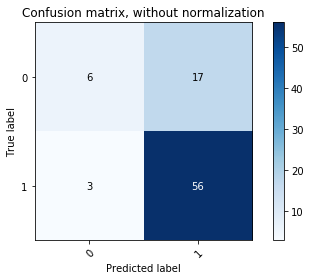

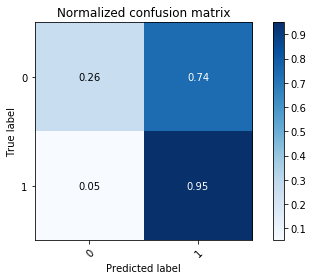

In [312]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred);

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, normalize=True);